# Clase 5.2: Cómputo Científico

## i.e. ¿En esta clase vamos a aprender a *programar*, en todo el sentido de la palabra?

## ¿Qué es programar?

Programar podemos pensarlo como utilizar un lenguaje de programación para escribir un programa que haga algo que yo desee. La programación en general es una cosa **muy, muy, muy amplia**. Mucha gente de distintas áreas y con distintos problemas a resolver sabe programar en algún lenguaje orientado a los problemas que necesita resolver.

Nosotros no vamos a aprender ni a hacer cosas de progrmación en general y abstracto o aplicadas a algo "ajeno" a ciencias naturales (como bases de datos, páginas web, desarrollo de apps, etc). Nosotros haremos algo que se conoce como **cómputo científico** que se encarga de utilizar la computadora, básicamente, para resolver problemas matemáticos de manera aproximada.

### ¿Qué problemas matemáticos?: los más aplicables a física

* Calcular una derivada, calcular una integral
* Resolver un sistema de ecuaciones lineales
* Resolver una Ecuacion Diferencial Ordinaria (EDO)
* Resolver una Ecuación Diferencial Parcial (EDP)

Esta es una clase de **cómputo científico aplicado a física**. En el cómputo científico, debemos de enfrentarnos a varios problemas, a errores que pueden surgir de los resultados **numéricos** (no abstractos, no analíticos ni exactos) que obtengamos de nuestros problemas

### ¿Por qué existe el cómputo científico? 

En general, hay muchísimos problemas de física y matemáticas que es imposible resolver de manera analítica. Por dar algunos ejemplos:

* Resolver la ecuación diferencial $\ddot{x} + k \sin{(x)} = 0 $ (ecuación de un péndulo real)

* Expresar la integral $\int_{0}^x e^{-s^2} \; ds$

### Aunque esta clase se enfoque en utilizar la computadora para resolver problemas matemáticos  que surgen en física ¿de verdad no me va a servir para alguna otra cosa?

**Si:** esta clase los va a introducir a la programación a un nivel básico y matemático. A partir de esto, ustedes en el futuro pueden profundizar sobre programación con las bases que obtendrán en este curso para tener una mejor idea y visión de cómo hacer cosas más generales (i.e. como hacer una app, como descargar cosas de bases de datos, etc, etc.)

## Errores numéricos

Por lo que platicamos de los sistemas de punto flotante, no todos los números se representan exactamente, por lo que las operaciones no siempre nos van a dar el resultado exacto. Por otro lado, muchas de las operaciones que realiza la computadora, aunque las hagamos en numeros representados exactamente, **no se hacen** de manera exacta si no aproximada.

A los problemas por no representar exactamente un número (aritmética de punto flotante) normalmente les llaman **errores de redondeo**

A los problemas por hacer un cálculo con un método no exacto, les llaman **error de aproximación**

### Ejemplo de un error de aproximación. la función `sqrt`

In [1]:
# hagamos un ejemplo
aprox = sqrt(2)^2
real = 2

2

In [2]:
# ¿sqrt(2)^2 es igual a 2 ?
aprox == real

false

Notemos que, aunque analíticamente sabemos que los números deberían ser iguales, hay un error de aproximación con las operaciones `sqrt` y `^` que provoca que en la práctica números no sean exactamente iguales. Podemos imprimirlos para ver que realmente son diferentes.

In [3]:
println(aprox)

2.0000000000000004


In [4]:
println(real)

2


### ¿Qué hacemos?

Explicar a fondo de donde surgen estos errores de aproximación es algo que escapa nuestras capacidades computacionales y matemáticas, por lo que ahora no podemos evadirlos. Sin embargo, podemos darles la vuelta de una manera ingeniosa.

En lugar de preguntarnos, si dos numeros que sabemos analíticamente son iguales pero en la práctica no lo son, podemos preguntarnos si son **muy, muy cercanos**

In [7]:
# ¿sqrt(2)^2 es muy cercano a 2?
abs(aprox - real) < 10^(-15)

true

**Hay que convertir nuestras preguntas por igualdad, en preguntas por cercanía.**

## Velocidades de convergencia

Ya que nuestros métodos aproximados para hacer cálculos no dan el valor exacto si no uno aproximado, podemos preguntarnos por que tan rápido se acercan al valor real dichas aproximaciones que hacemos.

El análisis de qué tan rápido se acercan al valor real es algo que se llama **velocidad de convergencia**

### Ejemplo: $\pi$

Fórmula de Basel

$$
\sum_{k=1}^{\infty} \frac{1}{k^2} = \frac{\pi^2}{6} \approx  \sum_{k=1}^{n} \frac{1}{k^2}
$$

Fórmula de Leibniz

$$
\sum_{k=0}^{\infty} \frac{(-1)^k}{2k+1} = \frac{\pi}{4} \approx \sum_{k=0}^{n-1} \frac{(-1)^k}{2k+1}
$$

In [8]:
# calcula pi utilizando la fórmula de basel
function piBasel(n)
    # hago la suma de la fórmula
    suma = 0
    for k in 1:n
        suma = suma + 1/k^2
    end
    # ya que la formula me da en realidad pi^2/6
    # multiplico por 6 y saco raíz para obtener pi
    res = sqrt(6 * suma)
    return res
end

piBasel (generic function with 1 method)

In [11]:
piBasel(40)

3.117926198299378

In [12]:
# aproxima pi utilizando la fórmula de Leibniz
function piLeibniz(n)
    # hago la suma
    suma = 0
    for k in 0:(n-1)
        suma = suma + (-1)^k/(2*k+1)
    end
    # la suma me da pi/4, por lo que multiplico el resultado por 4
    res = suma*4
    return res
end

piLeibniz (generic function with 1 method)

In [14]:
piLeibniz(40)

3.116596556793833

In [18]:
# import Plots para hacer gráficas
using Plots

In [19]:
# hare una gráfica para comparar cuanto se acerca a pi cada aproximación como función de n
function comparacion(n)
    xs = 1:n
    # grafico el error absoluto: la diferencia entre el valor real y el obtenido
    ys1 = [abs(pi-piBasel(x)) for x in xs]
    ys2 = [abs(pi-piLeibniz(x)) for x in xs]
    # grafico primero la aproximación de basel
    # alpha es la transparencia de los puntos en la gráfica. Tomo alpha = 0.7
    scatter(xs,ys1,label="Basel",title="comparacion",xlabel="terminos en la suma",ylabel="error absoluto",alpha=0.7)
    # quiero añadir a la misma gráfica la gráfica de la aproximación de Leibniz
    # para eso, uso `scatter` PERO pongo un signo de admiración 
    # para que añada la nueva gráfica a la anterior
    scatter!(xs,ys2,label="Leibniz",alpha=0.7)
end

comparacion (generic function with 1 method)

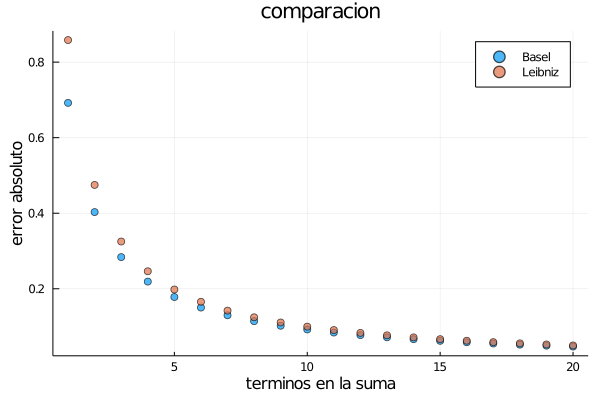

In [20]:
comparacion(20)

Parece que el error absoluto va disminuyendo conforme aumentan los términos de la suma. El error también seguir una función exponencial decreciente respecto a la suma, o bien, una ley de potencias. Podemos verificar esto haciendo gráficas en escala logarítmica en ambos ejes

In [21]:
# hare una gráfica para comparar cuanto se acerca a pi cada aproximación como función de n
function comparacionLog(n)
    xs = 1:n
    # grafico el error absoluto: la diferencia entre el valor real y el obtenido
    ys1 = [abs(pi-piBasel(x)) for x in xs]
    ys2 = [abs(pi-piLeibniz(x)) for x in xs]
    # grafico primero la aproximación de basel
    # alpha es la transparencia de los puntos en la gráfica. Tomo alpha = 0.7
    # xscale=:log10 pone escala logarítmica en x
    # yscale=:log10 pone escala logarítmica en y
    scatter(xs,ys1,label="Basel",title="comparacion",xlabel="terminos en la suma",ylabel="error absoluto",alpha=0.7,xscale=:log10,yscale=:log10)
    # quiero añadir a la misma gráfica la gráfica de la aproximación de Leibniz
    # para eso, uso `scatter` PERO pongo un signo de admiración 
    # para que añada la nueva gráfica a la anterior
    scatter!(xs,ys2,label="Leibniz",alpha=0.7)
end

comparacionLog (generic function with 1 method)

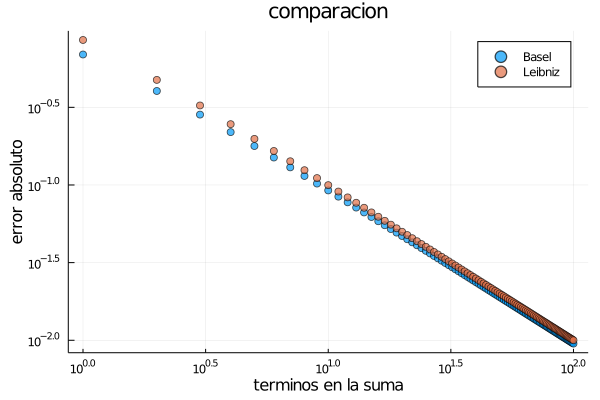

In [24]:
comparacionLog(100)

Como hay una relación lineal en la escala logarítimica, hay una relación de tipo ley de potencias entre el error absoluto y los términos de la suma:

$$
\text{error absoluto} = C \cdot \text{terminos}^B
$$

Más aún, es claro que el exponente de la aproximación de Basel es menor que el de Leibniz (la pendiente de la recta es menor)

Hacer el análisis anterior, nos muestra que el error absoluto disminuye más rápido con la serie de Besel que con la de Leibniz. **Este análisis nos muestra que es mejor utilizar una aproximación que otra**, es decir, que una **converge más rápidamente a la solución**

## Estabilidad

Hay problemas matemáticos, que dependen de algunos parámetros (i.e. coefficientes de una matriz, constantes de multiplicación, condiciones inciales, etc), tienen problemas de **estabilidad**. Es decir, que cambios pequeños en los parámetros del problema traen cambios **muy, muy grandes** en sus soluciones.

### Ejemplo: ecuaciones lineales

#### Sistema 1
\begin{cases}
x + y &= 2.0  \\
x + 1.01y &= 2.01 \\
\end{cases}

Solución: $x = 1$, $y=1$

#### ¿Qué pasa si cambio ligeramente el resultado de la segunda ecuación?
Sistema 2
\begin{cases}
x + y &= 2.0 \\
x + 1.01y &= 2.02 \\
\end{cases}

Solución: $x = 0$, $y = 2$

### ¿Qué acaba de pasar? ¿Por que las soluciones a ambos sistemas son taaan distintas si los sistemas son casi iguales?

Aunque cambiamos un valor en un orden de magnitud muy pequeño ($10^{-2}$), las soluciones al sistema cambiaron mucho (en sentido **relativo**, hubo un cambio de 100 % en las soluciones) 

Cuando un problema matemático tiene esta propiedad de que sus resultados son muy sensibles a cambios en sus condiciones, decimos que el sistema es **inestable** (*ill-posed*)

Trabajar con sistemas inestables es **muy, muy difícil** si además estámos usando aproximaciones para resolverlos. Existe toda una rama de la matemática que trabaja con esos problemas y es la llamada **teoría del caos**. En particular, por los errores numéricos (de aproximación y de redondeo) que hay a la hora de hacer cómputo científico, si nos enfretamos a problemas intestables es muy probable que las soluciones que obtengamos tengan un error muy grande o sean muy distantes de las soluciones analíticas reales.

En el curso, **casi nunca** vamos a trabajar con sistemas inestables para evitar estos problemas

### Ejercicio 1

Investiga y enuncia el teorema de Taylor. Es decir, el teorema mediante el cuál podemos aproximar una función $k$-veces derivable como un polinomio de grado $k$.

### Ejercicio 2

Compara las velocidades de convergencia de los siguients métodos para calcular $e$

* $\sum_{k=0}^{\infty} \frac{1}{k!}$
* $\lim_{n \to \infty} \left( 1 + \frac{1}{n} \right)^n$

**Sugerencia:** en Julia, la función `factorial(n)` me regresa el valor del factorial de `n`